In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
datasets = tf.keras.preprocessing.image_dataset_from_directory('D:\Datasets\House_Room_Dataset', image_size=(256, 256))

Found 9569 files belonging to 6 classes.


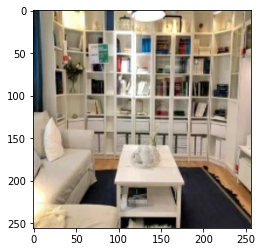

In [10]:
for data, labels in datasets.take(1):
    plt.imshow(data[0].numpy().astype('uint8'))
    plt.show()

In [11]:
labels[0]

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [12]:
classes = datasets.class_names
classes[labels[0]]

'Livingroom'

In [19]:
datasets

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
def dataset_normalize(data, labels):
    images = tf.cast(data/255.0, tf.float32)
    return images, labels

In [23]:
datasets = datasets.map(dataset_normalize)

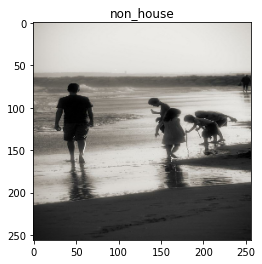

In [24]:
for data, label in datasets.take(1):
    plt.imshow(data[0].numpy())
    plt.title(classes[label[0]])
    plt.show()

In [30]:
def model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(256, (2, 2), (2, 2), activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, 2))
    model.add(tf.keras.layers.Conv2D(128, (2, 2), activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, 2))
    model.add(tf.keras.layers.Conv2D(64, (2, 2), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dense(32, activation="relu"))
    model.add(tf.keras.layers.Dense(6, activation="softmax"))
    return model

In [31]:
model = model()

In [32]:
model.compile(optimizer="adam", metrics=['accuracy'], loss = tf.keras.losses.SparseCategoricalCrossentropy())

In [33]:
model.fit(datasets, epochs=10)

Epoch 1/10
300/300 [==============================] - 694s 2s/step - loss: 1.0512 - accuracy: 0.5656
Epoch 2/10
300/300 [==============================] - 656s 2s/step - loss: 0.8641 - accuracy: 0.6433
Epoch 3/10
300/300 [==============================] - 652s 2s/step - loss: 0.7440 - accuracy: 0.7020
Epoch 4/10
300/300 [==============================] - 659s 2s/step - loss: 0.6390 - accuracy: 0.7504
Epoch 5/10
300/300 [==============================] - 659s 2s/step - loss: 0.4844 - accuracy: 0.8146
Epoch 6/10
300/300 [==============================] - 655s 2s/step - loss: 0.3350 - accuracy: 0.8784
Epoch 7/10
300/300 [==============================] - 652s 2s/step - loss: 0.2215 - accuracy: 0.9233
Epoch 8/10
300/300 [==============================] - 653s 2s/step - loss: 0.1502 - accuracy: 0.9506
Epoch 9/10
300/300 [==============================] - 655s 2s/step - loss: 0.1053 - accuracy: 0.9685
Epoch 10/10
300/300 [==============================] - 659s 2s/step - loss: 0.0730 - accura

In [37]:
file = tf.keras.preprocessing.image.load_img('D:/Datasets/House_Room_Dataset/Livingroom/living_11.jpg', target_size=(256, 256))

In [38]:
img = tf.keras.preprocessing.image.img_to_array(file)

In [39]:
img

array([[[172., 144., 105.],
        [179., 151., 112.],
        [179., 151., 112.],
        ...,
        [220., 196., 170.],
        [218., 194., 168.],
        [227., 203., 177.]],

       [[170., 142., 102.],
        [167., 139.,  99.],
        [166., 138.,  98.],
        ...,
        [215., 191., 165.],
        [213., 189., 163.],
        [222., 198., 172.]],

       [[175., 148., 103.],
        [175., 148., 103.],
        [171., 144., 101.],
        ...,
        [216., 192., 168.],
        [214., 190., 164.],
        [221., 197., 171.]],

       ...,

       [[255., 255., 253.],
        [254., 255., 250.],
        [254., 254., 252.],
        ...,
        [255., 255., 250.],
        [251., 250., 248.],
        [253., 253., 251.]],

       [[254., 255., 255.],
        [254., 255., 253.],
        [254., 255., 255.],
        ...,
        [253., 251., 252.],
        [255., 253., 254.],
        [255., 254., 255.]],

       [[252., 255., 255.],
        [252., 255., 255.],
        [252., 2

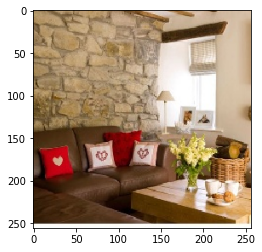

In [40]:
imgs = tf.cast(img/255.0, tf.float32)
plt.imshow(imgs.numpy())

In [44]:
imges = tf.expand_dims(imgs, axis=0)
imges

<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[0.6745098 , 0.5647059 , 0.4117647 ],
         [0.7019608 , 0.5921569 , 0.4392157 ],
         [0.7019608 , 0.5921569 , 0.4392157 ],
         ...,
         [0.8627451 , 0.76862746, 0.6666667 ],
         [0.85490197, 0.7607843 , 0.65882355],
         [0.8901961 , 0.79607844, 0.69411767]],

        [[0.6666667 , 0.5568628 , 0.4       ],
         [0.654902  , 0.54509807, 0.3882353 ],
         [0.6509804 , 0.5411765 , 0.38431373],
         ...,
         [0.84313726, 0.7490196 , 0.64705884],
         [0.8352941 , 0.7411765 , 0.6392157 ],
         [0.87058824, 0.7764706 , 0.6745098 ]],

        [[0.6862745 , 0.5803922 , 0.40392157],
         [0.6862745 , 0.5803922 , 0.40392157],
         [0.67058825, 0.5647059 , 0.39607844],
         ...,
         [0.84705883, 0.7529412 , 0.65882355],
         [0.8392157 , 0.74509805, 0.6431373 ],
         [0.8666667 , 0.77254903, 0.67058825]],

        ...,

        [[1.        , 1.        , 

In [46]:
img.shape

(256, 256, 3)

In [47]:
model.predict(imges)

array([[1.7613814e-08, 5.9083945e-06, 5.9172307e-04, 4.2916796e-05,
        9.9862516e-01, 7.3430943e-04]], dtype=float32)

In [48]:
labels = model.predict(imges)

In [50]:
classes

['Bathroom', 'Bedroom', 'Dinning', 'Kitchen', 'Livingroom', 'non_house']

In [55]:
labels

array([[1.7613814e-08, 5.9083945e-06, 5.9172307e-04, 4.2916796e-05,
        9.9862516e-01, 7.3430943e-04]], dtype=float32)

In [56]:
tf.nn.softmax(labels)

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.12960213, 0.1296029 , 0.12967883, 0.12960769, 0.3518111 ,
        0.12969734]], dtype=float32)>

In [57]:
label = tf.nn.softmax(labels)

In [58]:
label

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.12960213, 0.1296029 , 0.12967883, 0.12960769, 0.3518111 ,
        0.12969734]], dtype=float32)>

In [61]:
classes[tf.argmax(label[0])]

'Livingroom'

In [62]:
model.save("D:/projects/banking_website/house_predictions.h5")

In [66]:
models = tf.keras.models.load_model("D:/projects/banking_website/house_predictions.h5")

In [67]:
output = models.predict(imges)

In [68]:
output

array([[1.7613814e-08, 5.9083945e-06, 5.9172307e-04, 4.2916796e-05,
        9.9862516e-01, 7.3430943e-04]], dtype=float32)

In [69]:
out = tf.nn.softmax(output)
out

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.12960213, 0.1296029 , 0.12967883, 0.12960769, 0.3518111 ,
        0.12969734]], dtype=float32)>

In [71]:
classes[tf.argmax(out[0])]

'Livingroom'